**Introduction to Machine Learning: Probability Part 2**   
Topics Covered:
1. Continuous Variables
2. Probability Density
3. Gaussian Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Continuous Variables**   
In the previous section discrete variables were covered, apples, oranges, red or blue boxes. The options were limited to those four and nothing more. Most of the time the problems presented are continuous instead of discrete. Examples of continuous variables are a persons weight or height.   
   
   The following section will show some different ways to express continuous variables. The initial example uses randomly sampled weights from 30 American men. 

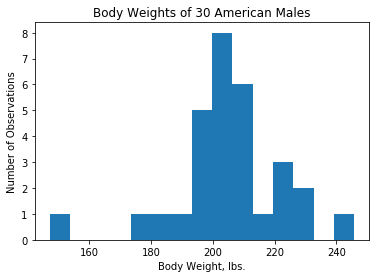

In [2]:
m_wght = [
    212.5, 231.2, 202.1, 224.5, 212.1, 
    245.8, 207.4, 200.8, 201.4, 222.6, 
    198.1, 211.6, 205.2, 205.6, 196.7, 
    223.7, 202.8, 213.8, 147.2, 199.8, 
    209.7, 193.6, 208.7, 226.7, 193.1, 
    197.2, 200.8, 182.3, 179.5, 198.3,
]

# using the matplotlib histogram to investigate
plt.hist(m_wght, 15)
plt.title('Body Weights of {} American Males'.format(len(m_wght)))
plt.xlabel('Body Weight, lbs.')
plt.ylabel('Number of Observations')
plt.show()

**Probability Density Function**   
A probability density function is a continuous representation of the data being analyzed. At its core it can be characterized as a best fit of how the data is believed to be distributed. Most of the time we have a very limited amount of data, so human intuition is required to guess the best fit.   
The probability that *x* will lie in an interval *(a,b)* is then given by: $$\int_a^b f(x)dx = P(a<X<b)$$ Which states that probability between two points is equal to the area under the probability density function. The probability density must satisfy the two conditions. $$\int_{-\infty}^{\infty}f(x)dx=1$$ $$P(x)\geqslant0$$ Basically the probability of a value has to be between 0 and 1, very similiar to discrete variables. The last thing to note is $$\int_{2}^{2} f(x)dx = P(2<X<2) = 0$$ Meaning the probability of a single point in a PDF is equal to zero. **Ask Dr.Butler to explain this, because in the Gaussian Naive Bayes we calculate the probability of a single point all the time**

**Gaussian Distribution**   
The *Gaussian* or *Normal* distribution is one of the most important distributions in statistics. Without getting into to much detail, many real life examples fit into a Gaussian distribution, thanks to the [*Central Limit Theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem). Fitting a gaussian probability density function requires the dataset mean $\mu$ and the standard deviation $\sigma$. The $\mathcal{N}$ symbol is used to denote a Gaussian Distribution. $$\mathcal{N}(x|\mu,\sigma^{2}) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$   
$$Mean: \mu$$ $$Standard Deviation: \sigma$$    
The code below will define the *gausspdf* function that will be used to calculate the values of the gaussian probability density function. The mean and standard deviation of the American male data will also be calculated.

In [51]:
# fitting a normal distribution to the male weights data.
# define a gaussian function
def gausspdf(x, mu, sigma):
    
    g_one = np.exp(-(x-mu)**2/(2*sigma**2))
    g_two = np.sqrt(2*np.pi*sigma**2)
       
    return g_one/g_two

m_mu = np.mean(m_wght)
m_sd = np.std(m_wght)

print(
    'Data Mean: {:.1f} and Standard Deviation: {:.1f}'.format(
        m_mu, m_sd))

Data Mean: 205.2 and Standard Deviation: 17.5


**Visualize Gaussian PDF and Original Sample**   
Instead of fitting the data the Gaussian function will fit to the bins that were defined in the matplotlib histogram plot. This allows a direct comparison of the actual bin count to the value calculated from the Gaussian PDF.

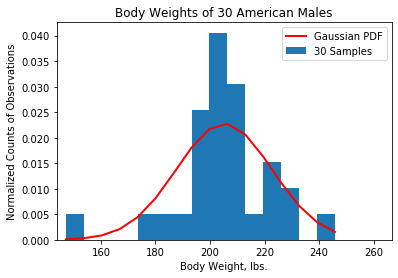

In [45]:
# break the histogram data in the counts and bin values
count, bins, ignored = plt.hist(
    x=m_wght, 
    bins=15, 
    density=True,
    label='{} Samples'.format(len(m_wght)))

# calculate the gaussian PDF at each bins values
m_gauss = gausspdf(bins, m_mu, m_sd)

# plot the Gaussian PDF onto Normalized data
plt.plot(
    bins, 
    m_gauss, 
    linewidth=2, 
    color='r',
    label='Gaussian PDF')

plt.title('Body Weights of {} American Males'.format(len(m_wght)))
plt.xlabel('Body Weight, lbs.')
plt.ylabel('Normalized Counts of Observations')
plt.legend()

y_btm, y_top = plt.ylim() # create consistent axis
x_low = m_mu-3.5*m_sd # 3.5 standard deviations below mean
x_hgh = m_mu+3.5*m_sd # 3.5 standard deviations above mean
plt.xlim(x_low,x_hgh)

plt.show()

As seen from the figure the Gaussian probability density function doesn't seem to fit the data. This is apparent towards the center of 205 pounds and the areas where large whitespace exists. Before making further judgement it should be remembered that the dataset only contained 30 points, which is relatively low.   
   
   Numpy has [functionality](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) to create a normally distributed random dataset. This provides an estimate of what the population might look like and how well the fit was. The numpy function will be used to generate a normally distributed dataset of 1000 samples.

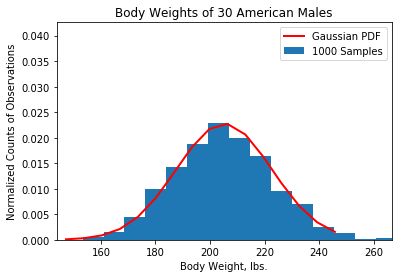

In [52]:
samples = 1000
np.random.seed(36) # seed for consistency in examples
p_wght = np.random.normal(m_mu, m_sd, samples) # create a new dataset

plt.hist(
    x=p_wght, 
    bins=15, 
    density=True,
    label='{} Samples'.format(len(p_wght)))

plt.plot(
    bins, 
    m_gauss, 
    linewidth=2, 
    color='r',
    label='Gaussian PDF')

plt.title('Body Weights of {} American Males'.format(len(m_wght)))
plt.xlabel('Body Weight, lbs.')
plt.ylabel('Normalized Counts of Observations')
plt.legend()

plt.ylim(y_btm, y_top) # consistent axis
plt.xlim(x_low, x_hgh) # consistent axis

plt.show()

Much better, by increasing the sample size from 30 to 1000 a better fit is visualized.

**Calculate Joint Probability of Continuous Variables**   
In the previous section it was discussed that the probability of single continuous point was zero. This is true, but *Naïve Bayes* offers a method to calculate the probability of a single continuous variable. Naïve Bayes makes the simplifying assumption that the value of a feature is *independent* of the value of any other feature. Under the independence assumption a joint probability of multiple points can be written: $$p(\vec{x}|\mu,\sigma^{2}) = \prod_{n=1}^{N}\mathcal{N}(x_{n}|\mu,\sigma^{2})$$ Where $\vec{x}$ is a vector of multiple observations: $$\vec{x} = (x_{1},...,x_{N})$$ The equation states that the probability of a vector is equal to the product of each observation in the vector's gaussian density.   
   
   Shown below is a graph of 1000 samples of the data. The independent points, $\vec{x}$, are marked with yellow dots and lines. The tail of the yellow line is the original $\vec{x}$ value, the circular marker head is the gaussian density relative to the distribution. Defined as *x_vec* and *x_gau* respectively.

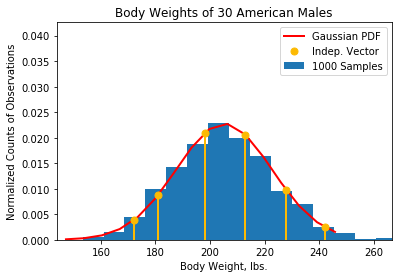

In [86]:
# define an x vector of interest
x_vec = np.asarray([172, 181, 198, 213, 228, 242])
x_gau = gausspdf(x_vec, m_mu, m_sd)
c_vec = '#fcba03' # color to pass

plt.hist( x=p_wght, bins=15, density=True,
    label='{} Samples'.format(len(p_wght)))

plt.plot(bins, m_gauss, linewidth=2, color='r', 
         label='Gaussian PDF')

plt.plot(x_vec, x_gau, ls='', marker='o', markersize=7, 
         color=c_vec, label='Indep. Vector')

for v, g in tuple(zip(x_vec, x_gau)):
    plt.vlines(v, 0, g, linewidth=2, color=c_vec)

plt.title('Body Weights of {} American Males'.format(len(m_wght)))
plt.xlabel('Body Weight, lbs.')
plt.ylabel('Normalized Counts of Observations')
plt.ylim(y_btm, y_top) # consistent axis
plt.xlim(x_low, x_hgh) # consistent axis
plt.legend()

plt.show()

Again, numpy has a convenient [function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.prod.html) for calculating the product of an array. Applying the function calculates the joint probability of all the individual data points.

In [95]:
# calculate the joint probability of the gaussian array
xg_prd = np.prod(x_gau)
print('Joint Probability is: {:.2e}'.format(xg_prd))

Joint Probability is: 3.52e-13


**Calculate Marginal Probability of Continuous Variable**   
Upon inspection of the joint probability equation if one was only interested in the marginal probability of one point it would simplify to the following: $$p(x_{n}|\mu,\sigma^{2}) = \mathcal{N}(x_{n}|\mu,\sigma^{2})$$   
*Pause...okay...so the gaussian is a probability density function right?*   
Yeah.   
*But integrating across one point of a probability density function is zero, right?*   
Yeah   
*So how does that work? Shouldn't it be zero?*   
It's best not to ask to many questions in the this scenario. Just plug in a single point, take the gaussian output as your probability and don't worry about it.   
   
   As an example, the previous continuous vector and gaussian vector can have there individual points inspected.

In [94]:
for v, g in tuple(zip(x_vec, x_gau)):
    print('For {} lbs. probability is {:.1e}'.format(v,g))

For 172 lbs. probability is 3.8e-03
For 181 lbs. probability is 8.8e-03
For 198 lbs. probability is 2.1e-02
For 213 lbs. probability is 2.1e-02
For 228 lbs. probability is 9.7e-03
For 242 lbs. probability is 2.5e-03
